<h2> Capstone Project Module 2 - Sales SaaS </h2> 

**Overview**:
- Data terdiri dari 9.994 baris dan 19 kolom yang berisi transaksi penjualan dari produk Saas
- Data final yang diobservasi setelah data cleaning: 9.801.
- Projek ini menganalisis data penjualan dari perusahaan Software-as-a-Service (SaaS) yang beroperasi di berbagai industri dan wilayah. 
- Main variable: Profit, Sales, Discount, dan Quantity.

**Tujuan Analisis adalah untuk**:
- Mengidentifikasi hubungan antar variabel penjualan (discount, sales, quantity) terhadap profit.
- Menemukan potensi kerugian dan efisiensi berdasarkan industri dan wilayah.
- Mengidentifikasi tren musiman dalam penjualan untuk mendukung strategi promosi.
- Mengidentifikasi produk dengan penjualan dan profit tertinggi sebagai dasar keputusan produk utama.
- Memberikan rekomendasi strategis berbasis data untuk meningkatkan profit dan retensi pelanggan.

**Hipotesis yang di Uji**:

**1.Hubungan antar Variabel Penjualan terhadap Profit**
- H0: Tidak terdapat hubungan antara nilai sales terhadap profit.
- H1: Terdapat hubungan signifikan antara sales dengan profit..

**2. Hubungan Diskon dan Profit**
- H0: Diskon yang diberikan tidak memengaruhi profit secara signifikan.
- H1: Diskon besar akan menurunkan profit.

**3. Distribusi Profit antar Industri**
- H0: Tidak ada perbedaan signifikan pada distribusi profit antar industri.
- H1: Terdapat perbedaan distribusi profit yang signifikan antar industri.

**Sedangkan tujuan lainnya, seperti tren penjualan di cek dari trend line dan produk dengan penjualan dan profit tertinggi di cek dari visualisasi**

**Metode: Non-Parametrik**

digunakan untuk mengatasi masalah normalitas dan outlier.

**Data Berdasarkan Dimensi dan Kategori**
| Dimensi      | Kategori                              |
|--------------|---------------------------------------|
| Geografis    | Regions, Subregions, Countries, Cities|
| Pelanggan    | Industries, Segments, Customers       |
| Produk       | Products, Licenses, Discounts         |
| Keuangan     | Sales, Quantity, Profit, Discount     |

<h2> 1. Import Library </h2>

In [3]:
# import library 
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, shapiro, kruskal, spearmanr
from scipy import stats
import itertools
from itertools import combinations

<h2> 2. Data Loading and Preview </h2>

In [4]:
# baca data dari file CSV ke dalam DataFrame pandas
df = pd.read_csv('SaaS-Sales.csv')

In [5]:
# preview data 
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [6]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


In [7]:
df.dtypes

Row ID            int64
Order ID         object
Order Date       object
Date Key          int64
Contact Name     object
Country          object
City             object
Region           object
Subregion        object
Customer         object
Customer ID       int64
Industry         object
Segment          object
Product          object
License          object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**Notes**: format Order Date perlu diubah karena masih dalam bentuk object

In [8]:
# Ubah tanggal agar terformat dengan benar 
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,2022-06-13,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,2021-10-11,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [9]:
df.dtypes

Row ID                   int64
Order ID                object
Order Date      datetime64[ns]
Date Key                 int64
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
License                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object

**Penjelasan**:

Berdasarkan pemeriksaan terhadap data types dengan df.dtypes setelah mengubah data time, format 'Order Date' sudah sesuai dan dapat dikatakan bahwa data sudah benar sesuai dengan jenisnya masing-masing.

<h2> 3. Data dan Statistik Deskriptif (Pre-processing) </h2>

**Sebelum melakukan data cleansing, kita perlu mengenali dan  melihat karakteristik dari data kita dengan melihat data dan statistik deskriptifnya**

In [10]:
# Statistik Deskriptif
stat_desc = df.describe()
stat_desc

,Row ID,Order Date,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2022-05-01 00:07:12.259355648,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
min,1.000000,2020-01-04 00:00:00,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2021-05-23 00:00:00,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2022-06-27 00:00:00,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2023-05-15 00:00:00,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2023-12-31 00:00:00,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108


In [11]:
print(stat_desc)

            Row ID                     Order Date      Date Key  Customer ID  \
count  9994.000000                           9994  9.994000e+03  9994.000000   
mean   4997.500000  2022-05-01 00:07:12.259355648  2.021803e+07  1049.771963   
min       1.000000            2020-01-04 00:00:00  2.020010e+07  1001.000000   
25%    2499.250000            2021-05-23 00:00:00  2.021052e+07  1024.000000   
50%    4997.500000            2022-06-27 00:00:00  2.022063e+07  1049.000000   
75%    7495.750000            2023-05-15 00:00:00  2.023052e+07  1076.000000   
max    9994.000000            2023-12-31 00:00:00  2.023123e+07  1101.000000   
std    2885.163629                            NaN  1.123898e+04    29.719388   

              Sales     Quantity     Discount       Profit  
count   9994.000000  9994.000000  9994.000000  9994.000000  
mean     229.858001     3.789574     0.156203    28.656896  
min        0.444000     1.000000     0.000000 -6599.978000  
25%       17.280000     2.000000   

In [12]:
# Statistik Deskriptif - include data kategorikal
df.describe(include="all")

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9.994000e+03,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,793,48,262,3,12,99,NaN,10,3,14,9994,NaN,NaN,NaN,NaN
top,NaN,EMEA-2023-100111,NaN,NaN,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,NaN,Finance,SMB,ContactMatcher,3NTBV9B3PS,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,37,2001,922,4219,2507,192,NaN,2127,5191,1842,1,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2022-05-01 00:07:12.259355648,2.021803e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.771963,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2020-01-04 00:00:00,2.020010e+07,NaN,NaN,NaN,NaN,NaN,NaN,1001.000000,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2021-05-23 00:00:00,2.021052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1024.000000,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2022-06-27 00:00:00,2.022063e+07,NaN,NaN,NaN,NaN,NaN,NaN,1049.000000,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2023-05-15 00:00:00,2.023052e+07,NaN,NaN,NaN,NaN,NaN,NaN,1076.000000,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2023-12-31 00:00:00,2.023123e+07,NaN,NaN,NaN,NaN,NaN,NaN,1101.000000,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


**Data Karakteristik**
- Jumlah data awal: 9.994 baris
- Duplikasi dan data anomali akan dihapus.

<h2> 4.Data Cleaning: Missing Value dan Data Duplikat </h2>

<h3> 4.1 Data Null/Missing Value </h3>

In [13]:
# cek jumlah data 
df.count()

Row ID          9994
Order ID        9994
Order Date      9994
Date Key        9994
Contact Name    9994
Country         9994
City            9994
Region          9994
Subregion       9994
Customer        9994
Customer ID     9994
Industry        9994
Segment         9994
Product         9994
License         9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

**Penjelasan**: Tidak ada missing values, data utuh dan masih lengkap

In [14]:
# cek missing value
missing_data = df.isnull().sum()
print(missing_data)

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


<h3> 4.2 Pencarian Data Duplikat </h3>

In [15]:
duplicate_subset = ['Order ID', 'Product', 'Quantity', 'Sales']
duplicate_rows = df[df.duplicated(subset=duplicate_subset, keep=False)].sort_values(by='Order ID')

In [16]:
# Cek dan lihat duplikat
duplicate_rows.head(10)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
3405,3406,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,KUQ229Y2EX,281.372,2,0.3,-12.0588
3406,3407,AMER-2020-150119,2020-04-23,20200423,Natalie Skinner,Mexico,Mexico City,AMER,LATAM,Itochu,1032,Finance,Enterprise,FinanceHub,TMZYTXLB5T,281.372,2,0.3,-12.0588
3276,3277,EMEA-2020-102988,2020-04-05,20200405,Alan Gill,Spain,Alicante,EMEA,EU-WEST,Panasonic,1091,Tech,Strategic,ChatBot Plugin,BOV68ETZQG,22.960,7,0.0,7.5768
3279,3280,EMEA-2020-102988,2020-04-05,20200405,Alan Gill,Spain,Alicante,EMEA,EU-WEST,Panasonic,1091,Tech,Strategic,ChatBot Plugin,TL3XF563H5,22.960,7,0.0,6.6584


In [17]:
duplicate_rows[['Order ID', 'Product', 'Sales', 'Profit', 'License']].head(10)


,Order ID,Product,Sales,Profit,License
3405,AMER-2020-150119,FinanceHub,281.372,-12.0588,KUQ229Y2EX
3406,AMER-2020-150119,FinanceHub,281.372,-12.0588,TMZYTXLB5T
3276,EMEA-2020-102988,ChatBot Plugin,22.960,7.5768,BOV68ETZQG
3279,EMEA-2020-102988,ChatBot Plugin,22.960,6.6584,TL3XF563H5


**Penjelasan**: Terdapat baris duplikat yang identik yang diklasifikasikan berdasarkan Order ID yang sama dan hampir semua detailnya memiliki kesamaan.

**Hasil Penelusuran**: 

Pengecekan Duplikasi: terdapat duplikat pada 2 order ID yang sama dengan jumlah sebanyak 4 baris. 
- AMER-2020-150119 seluruh detail nya sama, hanya beda di lisensi 
- EMEA-2020-102988 seluruh detail nya sama, hanya beda di lisensi dan profit 

**Solusi Penanganan**: 
- hapus duplikat pada AMER-2020-150119 dan merge lisensinya 
- hapus duplikat dEMEA-2020-102988 dan ambil profitnya lebih besar

<h3> 4.2 Cleaning Data Duplikat </h3>

In [18]:
# Summary Jumlah Duplikat

# Total Baris Duplikat
duplikat_total = df.duplicated(subset=['Order ID', 'Product', 'Quantity', 'Sales'], keep=False).sum()
print(f"Total baris duplikat (termasuk aslinya): {duplikat_total}")

# Duplikat yang hendak di hapus
duplikat_redundan = df.duplicated(subset=duplicate_subset).sum()
print(f"Jumlah duplikat yang bisa dihapus: {duplikat_redundan}")

Total baris duplikat (termasuk aslinya): 4
Jumlah duplikat yang bisa dihapus: 2


In [19]:
# Menangani duplikat AMER-2020-150119 (gabung license)
amer_rows = df[(df['Order ID'] == 'AMER-2020-150119') & (df['Product'] == 'FinanceHub')]
combined_license = ', '.join(amer_rows['License'].unique())
amer_clean = amer_rows.iloc[0].copy()
amer_clean['License'] = combined_license

# Hapus hanya baris FinanceHub dari AMER-2020-150119
df = df[~((df['Order ID'] == 'AMER-2020-150119') & (df['Product'] == 'FinanceHub'))]

# Tambahkan baris yang sudah bersih
df = pd.concat([df, amer_clean.to_frame().T], ignore_index=True)

In [20]:
# Menangani duplikat EMEA-2020-102988 (ambil profit tertinggi) 

# Pastikan kolom Profit numerik
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

emea_rows = df[(df['Order ID'] == 'EMEA-2020-102988') & (df['Product'] == 'ChatBot Plugin')]
combined_license_emea = ', '.join(emea_rows['License'].unique())
emea_clean = emea_rows.sort_values(by='Profit', ascending=False).iloc[0].copy()
emea_clean['License'] = combined_license_emea

# Hapus hanya baris ChatBot Plugin dari EMEA-2020-102988
df = df[~((df['Order ID'] == 'EMEA-2020-102988') & (df['Product'] == 'ChatBot Plugin'))]

# Tambahkan baris bersih
df = pd.concat([df, emea_clean.to_frame().T], ignore_index=True)

In [21]:
# cek data duplikat yang terhapus
# Tampilkan jumlah duplikat
print(f"Jumlah data setelah hapus duplikat: {len(df)}")

Jumlah data setelah hapus duplikat: 9992


<h2> 5.Data Cleaning: Outlier </h2>

**Data yang di anggap outlier**

**1. Dalam Lingkup Bisnis**:
   - Discount > 50%. Dianggap tidak wajar
   - Quantity > 10. Dianggap pembelian terlalu besar 
   - Profit < -2000 dan >5000 yang terlalu besar dan negatif yang sangat besar perlu diperhatikan
   - Sales > 5000 & Profit < 0

**2. Dalam Lingkup Statistik (3xIQR)**:
   - Sales < Q1 - 3*IQR atau Sales > Q3 + 3*IQR
   - Profit < Q1 - 3*IQR atau Profit > Q3 + 3*IQR

**Pendekatan**: Outlier di filter berdasarkan kombinasi dari pendekatan bisnis dan statistik atau dapat dikatakan Hybrid. menghapus outlier jika memenuhi kedua kriteria tersebut (kriteria bisnis dan statistik) dengan menggunakan AND. tujuannya agar tidak terjadi overcleaning.

<h3> 5.1 Proses dan Summary Data Cleaning  </h3>

In [22]:
# Outlier Manual: Sisi Bisnis
outlier_manual = (
    (df['Profit'] < -2000) | 
    (df['Profit'] > 5000) | 
    (df['Discount'] > 0.5) | 
    (df['Quantity'] > 10) | 
    ((df['Sales'] > 5000) & (df['Profit'] < 0))
)

# Outlier: IQR 
Q1 = df[['Sales', 'Profit']].quantile(0.25)
Q3 = df[['Sales', 'Profit']].quantile(0.75)
IQR = Q3 - Q1

# Gunakan 2.5xIQR (lebih longgar dari 3xIQR)
outlier_iqr = (
    (df['Sales'] < (Q1['Sales'] - 2.5 * IQR['Sales'])) | 
    (df['Sales'] > (Q3['Sales'] + 2.5 * IQR['Sales'])) |
    (df['Profit'] < (Q1['Profit'] - 2.5 * IQR['Profit'])) |
    (df['Profit'] > (Q3['Profit'] + 2.5 * IQR['Profit']))
)

# Penggabungan outlier: hanya yang memenuhi KEDUA kriteria (manual DAN IQR)
outlier = outlier_manual & outlier_iqr

# Data yang sudah clean di define
df_cleaned = df[~outlier].copy()

# Validasi perubahan
print(f"- Jumlah data setelah hapus duplikat: {len(df):,}")
print(f"- Outlier manual (ketentuan bisnis) : {outlier_manual.sum():,}")
print(f"- Outlier IQR                       : {outlier_iqr.sum():,}")
print(f"- Outlier final                     : {outlier.sum():,} ({outlier.mean():.1%})")
print(f"- Jumlah data setelah hapus outlier (cleaned):{len(df_cleaned):>10,}({len(df_cleaned)/len(df):.1%})")

- Jumlah data setelah hapus duplikat: 9,992
- Outlier manual (ketentuan bisnis) : 970
- Outlier IQR                       : 1,498
- Outlier final                     : 191 (1.9%)
- Jumlah data setelah hapus outlier (cleaned):     9,801(98.1%)


<h3> 5.2 Visualisasi Sebelum-Sesudah Data Cleaning  </h3>

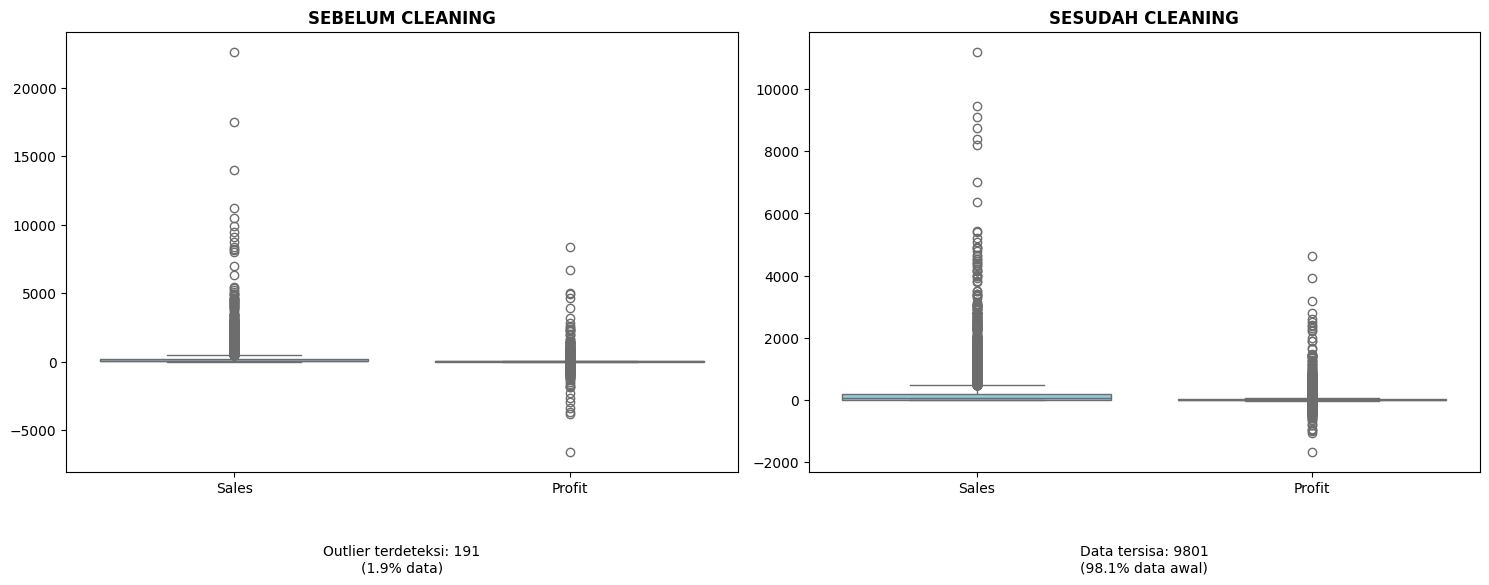

In [23]:
plt.figure(figsize=(15, 6))

# Sebelum Cleaning - Highlight Outlier Hybrid
plt.subplot(121)
sns.boxplot(data=df[['Sales', 'Profit']], palette={'Sales': 'skyblue', 'Profit': 'salmon'})
plt.title('SEBELUM CLEANING', weight='bold')

# Tambahkan anotasi jumlah outlier
plt.text(0.5, -0.2, 
         f"Outlier terdeteksi: {outlier.sum()}\n({outlier.mean():.1%} data)",
         ha='center', va='center', transform=plt.gca().transAxes)

# Sesudah Cleaning
plt.subplot(122)
sns.boxplot(data=df_cleaned[['Sales', 'Profit']], palette={'Sales': 'skyblue', 'Profit': 'salmon'})
plt.title('SESUDAH CLEANING', weight='bold')


# Tambahkan anotasi persentase data tersisa
plt.text(0.5, -0.2, 
         f"Data tersisa: {len(df_cleaned)}\n({len(df_cleaned)/len(df):.1%} data awal)",
         ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

**Sebelum Cleaning**: 
- Pada Sales, terlihat beberapa titik yang sangat tinggi (hingga di atas 20.000).
- Pada Profit, ada nilai yang sangat negatif (rugi besar) dan juga nilai positif yang tinggi.

**Setelah Cleansing**: 
- Setelah membersihkan data dari outlier, distribusi kedua variabel menjadi lebih rapat dan simetris.
- Rentang data lebih wajar dan tidak ada nilai ekstrem yang sangat tinggi atau rendah.
- Outlier telah dihilangkan, dan jumlah data tersisa adalah 9801 baris, atau 98.1% dari data awal.
- Ini berarti sebagian besar data dipertahankan, dan hanya outlier yang dibuang.

In [24]:
df_cleaned.describe()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7820\3849998710.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  df_cleaned.describe()


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
count,9801,9801,9801,9801,9801,9801,9801,9801,9801,9801,9801,9801,9801,9801,9801,9801.00,9801,9801.0,9801.0
unique,9801,4958,1235,1235,793,48,261,3,12,99,99,10,3,14,9801,5670.00,14,12.0,7103.0
top,3277,EMEA-2023-100111,2022-09-06 00:00:00,20220906,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,"BOV68ETZQG, TL3XF563H5",12.96,3,0.0,0.0
freq,1,13,37,37,36,1989,913,4146,2492,190,190,2087,5091,1781,1,56.00,2388,4769.0,65.0


In [25]:
# Cek lagi data typesnya
df_cleaned.dtypes

Row ID          object
Order ID        object
Order Date      object
Date Key        object
Contact Name    object
Country         object
City            object
Region          object
Subregion       object
Customer        object
Customer ID     object
Industry        object
Segment         object
Product         object
License         object
Sales           object
Quantity        object
Discount        object
Profit          object
dtype: object

In [26]:
# order date perlu diubah typesnya
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])

In [27]:
# validasi order date berhasil dirubah
df_cleaned.dtypes

Row ID                  object
Order ID                object
Order Date      datetime64[ns]
Date Key                object
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID             object
Industry                object
Segment                 object
Product                 object
License                 object
Sales                   object
Quantity                object
Discount                object
Profit                  object
dtype: object

In [28]:
# download data yang sudah bersih 
df_cleaned.to_excel('SaaS_Cleaned.xlsx', index=False)

<h2> 6. Exploratory Data Analysis (EDA) </h2>

<h3> 6.1 Statistik Deskriptif </h3>

**Pengecekan statistik deskriptif dengan data yang sudah di cleaning**

In [29]:
# Mendefine variabel numerik utama 
num_features = ['Sales', 'Quantity', 'Discount', 'Profit']

In [30]:
# Pastikan kolom-kolom numerik sudah dalam tipe yang benar
df_cleaned[num_features] = df_cleaned[num_features].apply(pd.to_numeric, errors='coerce')

# Verifikasi tipe data
print(df_cleaned[num_features].dtypes)

Sales       float64
Quantity      int64
Discount    float64
Profit      float64
dtype: object


In [31]:
# Analisis statistik deskriptif lengkap
def detailed_descriptive_analysis(df, features):
    stats_df = pd.DataFrame(index=features, columns=[
        'Count', 'Mean', 'Std', 'Min', '25%', 'Median', '75%', 'Max', 
        'Skewness', 'Kurtosis', 'IQR', 'CV', 'Missing', 'Zeros'
    ])
    
    for feature in features:
        stats_df.loc[feature, 'Count'] = len(df[feature])
        stats_df.loc[feature, 'Mean'] = df[feature].mean()
        stats_df.loc[feature, 'Std'] = df[feature].std()
        stats_df.loc[feature, 'Min'] = df[feature].min()
        stats_df.loc[feature, '25%'] = np.percentile(df[feature], 25)
        stats_df.loc[feature, 'Median'] = df[feature].median()
        stats_df.loc[feature, '75%'] = np.percentile(df[feature], 75)
        stats_df.loc[feature, 'Max'] = df[feature].max()
        stats_df.loc[feature, 'Skewness'] = stats.skew(df[feature])
        stats_df.loc[feature, 'Kurtosis'] = stats.kurtosis(df[feature])
        stats_df.loc[feature, 'IQR'] = stats.iqr(df[feature])
        stats_df.loc[feature, 'CV'] = stats_df.loc[feature, 'Std'] / stats_df.loc[feature, 'Mean']
        stats_df.loc[feature, 'Missing'] = df[feature].isnull().sum()
        stats_df.loc[feature, 'Zeros'] = (df[feature] == 0).sum()
    
    return stats_df

# Jalankan analisis
detailed_stats = detailed_descriptive_analysis(df_cleaned, num_features)
detailed_stats

,Count,Mean,Std,Min,25%,Median,75%,Max,Skewness,Kurtosis,IQR,CV,Missing,Zeros
Sales,9801,213.912097,496.529813,0.444,16.776,51.84,203.88,11199.968,7.599738,96.564011,187.104,2.321186,0,0
Quantity,9801,3.735843,2.14688,1,2.0,3.0,5.0,14,1.172399,1.514738,3.0,0.574671,0,0
Discount,9801,0.148356,0.196491,0.0,0.0,0.15,0.2,0.8,1.751472,2.901857,0.2,1.324451,0,4769
Profit,9801,33.355848,154.172413,-1665.0522,1.9845,8.799,29.372,4630.4755,10.640853,211.319019,27.3875,4.62205,0,65


**Tidak ada missing value diseluruh data**

**Interpretasi**: 

- **Sales**: Skewness = 7.6 dan Kurtosis = 96.5. Artinya, data sangat tidak normal, ekstrem positif skewed dan banyak outlier. Variasinya tinggi. 
- **Quantity**: Skewness =1.2  relatif normal, Median ≈ Mean, datanya hampir simetreis. 
- **Discount**: Miring ke kanan dan ada mild outliers. banyak angka nol (namun masih masuk akal karena memang tidak ada discount).
- **Profit**: Skewness=  2.5 dan Kurtosis 211.3. Artinya, sangat tidak normal banyak variasi data, banyak outlier besar, dan ada nilai negatif yang besar.

<h3> 6.2 Visualisasi dan Distribusi Data </h3>

<h4> 6.2.1 Visualisasi Distribusi, Outlier, dan Uji Normalitas pada Variabel Numerik </h4>

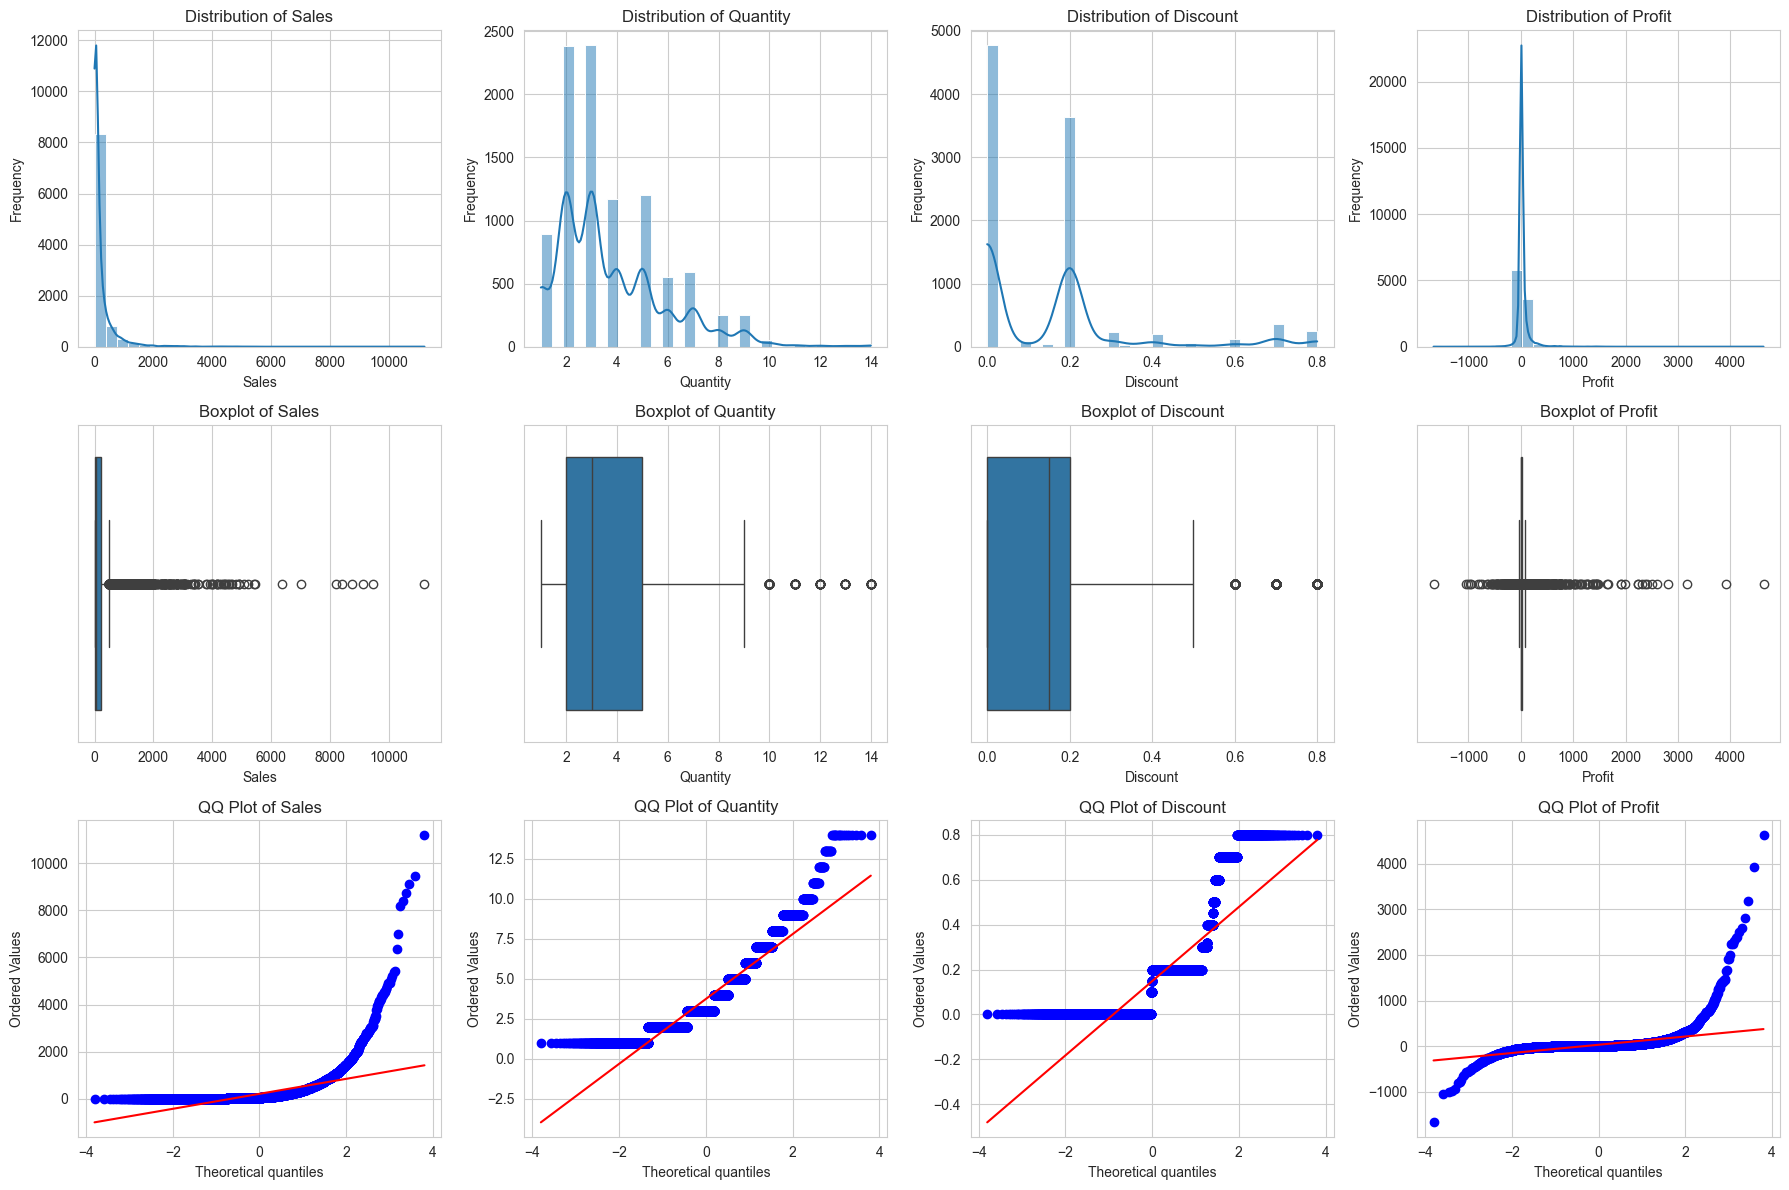

In [32]:
# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(18, 12))

# Visualisasi distribusi untuk setiap fitur numerik
for i, feature in enumerate(num_features):
    # Histogram dengan density plot
    plt.subplot(3, 4, i+1)
    sns.histplot(df_cleaned[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(3, 4, i+5)
    sns.boxplot(x=df_cleaned[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    
    # QQ plot untuk mengecek normalitas
    plt.subplot(3, 4, i+9)
    stats.probplot(df_cleaned[feature], plot=plt)
    plt.title(f'QQ Plot of {feature}')

plt.tight_layout()
plt.show()

**Interpretasi:**
- Sales: Histogram & QQ sangat skewed, banyak outlier
- Quantity: QQ plot mendekati normal, outlier sedikit
- Discount: Histogram bertingkat (multi-puncak), outlier kecil
- Profit: Histogram & QQ plot ekstrem, outlier negatif & positif

<h4> 6.2.2 Boxplot: Distribusi Profit per Industri </h4>

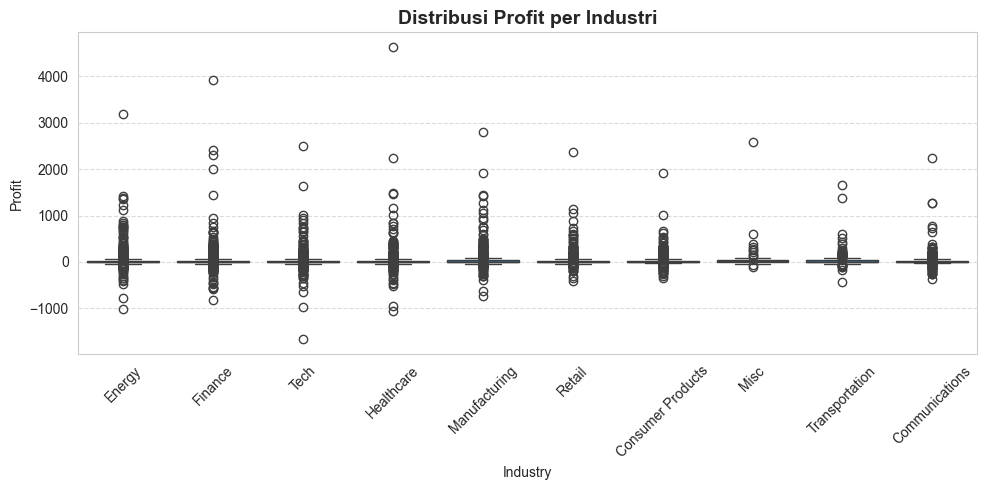

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Industry', y='Profit', data=df_cleaned)

plt.title('Distribusi Profit per Industri', fontsize=14, fontweight='bold')
plt.xlabel('Industry')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretasi:**
- Sebaran profit bervariasi antar industri
- Masalah Outlier banyak terjadi, banyaknya nilai negatif dan positif yang besar
- Misc, Transportation, Consumer Products sebarannya lebih kecil. Artinya, profitnya lebih konsisten.
- Finance, Healthcare, Manufacturing memiliki median profit yang lebih tinggi.
- Median profit Misc dan Communications berada pada nilai yang hampir nol. Artinya, banyak transaksi hampir dapat dikatakan seimbang.

<h4> 6.2.3 Barplot: Profit per Region </h4>

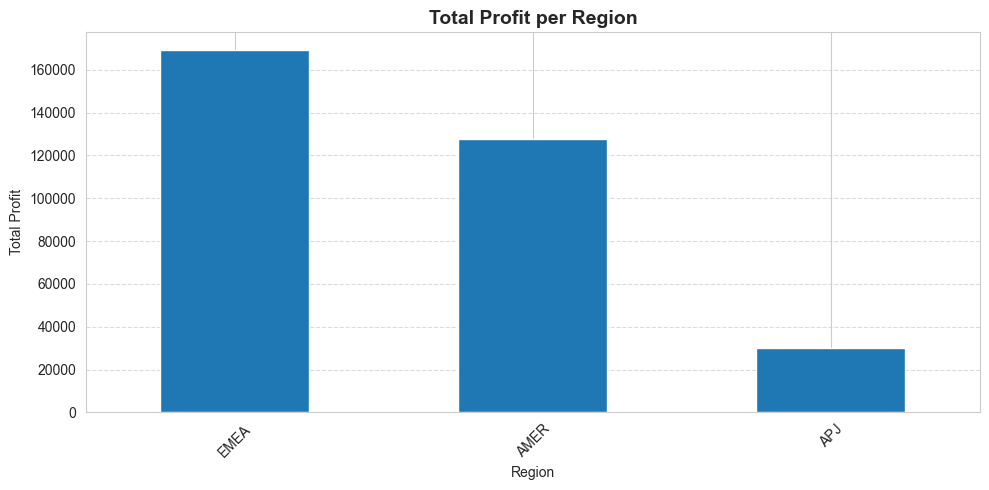

In [34]:
plt.figure(figsize=(10, 5))
df_cleaned.groupby('Region')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Profit per Region', fontsize=14, fontweight='bold')
plt.ylabel('Total Profit')
plt.xlabel('Region')
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretasi**:
- EMEA (Europe, Middle East, and Africa) menghasilkan total profit tertinggi di antara ketiga region, yaitu lebih dari 160.000 unit. 
- AMER (Americas) berada di posisi kedua dengan total profit sekitar 130.000.
- APJ (Asia Pacific and Japan) mencatatkan total profit terendah.

<h4> 6.2.4 Barplot: Sales per Region </h4>

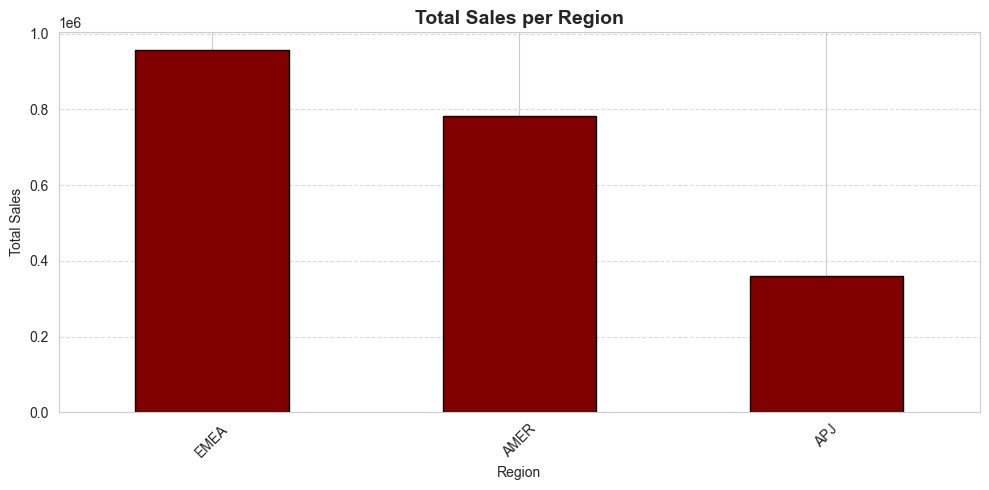

In [35]:
plt.figure(figsize=(10, 5))
df_cleaned.groupby('Region')['Sales'].sum().sort_values(ascending=False).plot(
    kind='bar', color='maroon', edgecolor='black'
)

plt.title('Total Sales per Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Interpretasi**: 
- EMEA (Europe, Middle East, and Africa) mencatatkan total sales tertinggi, mendekati 1 juta unit.
- AMER (Americas) berada di posisi kedua dengan total penjualan.
- APJ (Asia Pacific and Japan) kembali menjadi region dengan total penjualan terendah.

**Analisis Berdasarkan Wilayah Berdasarkan Sales dan Profit**:
- EMEA (Europe, Middle East, and Africa) memiliki penjualan dan margin profit tertinggi. Alokasi bisnis akan lebih menguntungkan di wilayah ini. 
- APJ (Asia Pacific and Japan) memiliki margin profit dan penjualan terendah. 
- AMER cukup seimbang, dengan volume penjualan dan profit yang relatif tinggi, meskipun margin sedikit di bawah EMEA.

<h4> 6.2.5 Barplot: Quantity per Segment </h4>

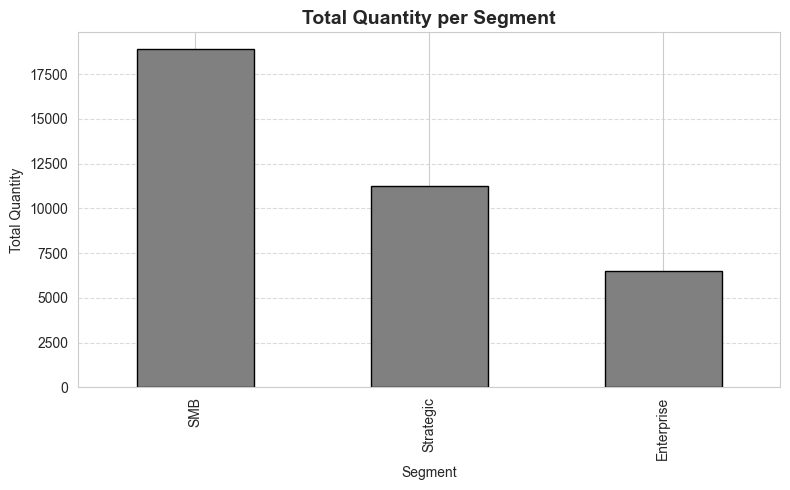

In [36]:
plt.figure(figsize=(8, 5))
df_cleaned.groupby('Segment')['Quantity'].sum().sort_values(ascending=False).plot(
    kind='bar', color='grey', edgecolor='black'
)

plt.title('Total Quantity per Segment', fontsize=14, fontweight='bold')
plt.xlabel('Segment')
plt.ylabel('Total Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Interpretasi**:
- Segmen SMB (Small and Medium Business) atau UMKM memiliki jumlah produk/layanan terbanyak yang terjual, yaitu sekitar lebih dari 18.000 unit.
- Segmen Strategic berada di posisi kedua dengan total quantity sekitar lebih dari 11.000 unit.
- Segmen Enterprise menunjukkan jumlah penjualan terendah, sekitar lebih dari 6.000 unit.

<h4> 6.2.6 Barplot: Rata-rata Profit per Industri </h4>

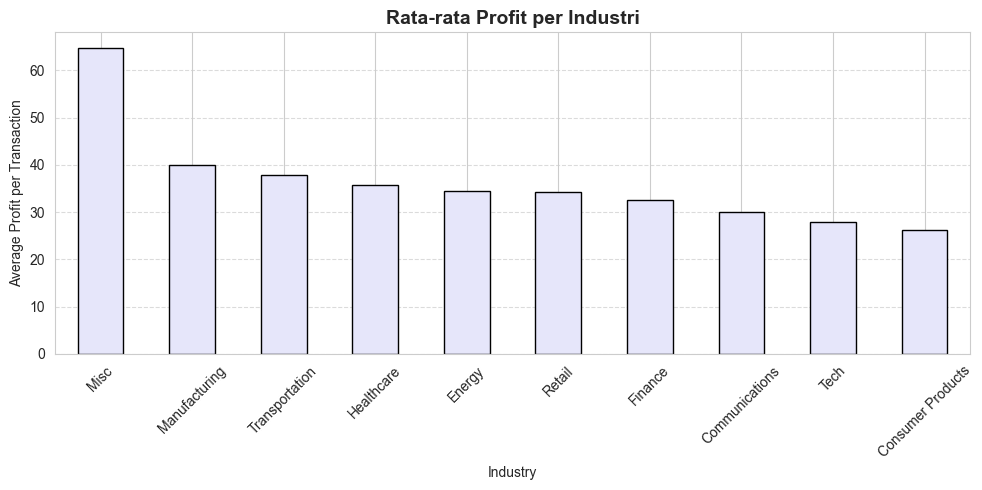

In [37]:
plt.figure(figsize=(10, 5))
df_cleaned.groupby('Industry')['Profit'].mean().sort_values(ascending=False).plot(
    kind='bar', color='lavender', edgecolor='black'
)

plt.title('Rata-rata Profit per Industri', fontsize=14, fontweight='bold')
plt.xlabel('Industry')
plt.ylabel('Average Profit per Transaction')
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Interpretasi**:
- Industri Misc (Miscellaneous) memiliki rata-rata profit per transaksi tertinggi, yaitu sekitar 65 unit. Industri ini berpotensi menjadi segmen dengan margin tinggi.
- Diikuti Manufacturing, Transportation, dan Healthcare, dengan rata-rata profit per transaksi antara 35–40. Masih menguntungkan, cocok untuk difokuskan dalam strategi B2B.
- Industri dengan rata-rata profit terendah adalah Consumer Products dan Tech, yang hanya sekitar 25–28. Industri ini sebetulnya in general berpotensi, profit yang rendah ini penyebabnya dimungkinkan karena: persaingan harga,biaya tinggi, strategi harga yang belum optimal.

<h4> 6.2.7 Violin Plot: Distribusi Profit per Industri </h4>

**Bentuk violin menunjukkan kepadatan distribusi profit**:
- Bagian yang lebih tebal berarti banyak transaksi berada di kisaran tersebut.
- Bagian yang lebih tipis berarti frekuensi transaksi lebih rendah.

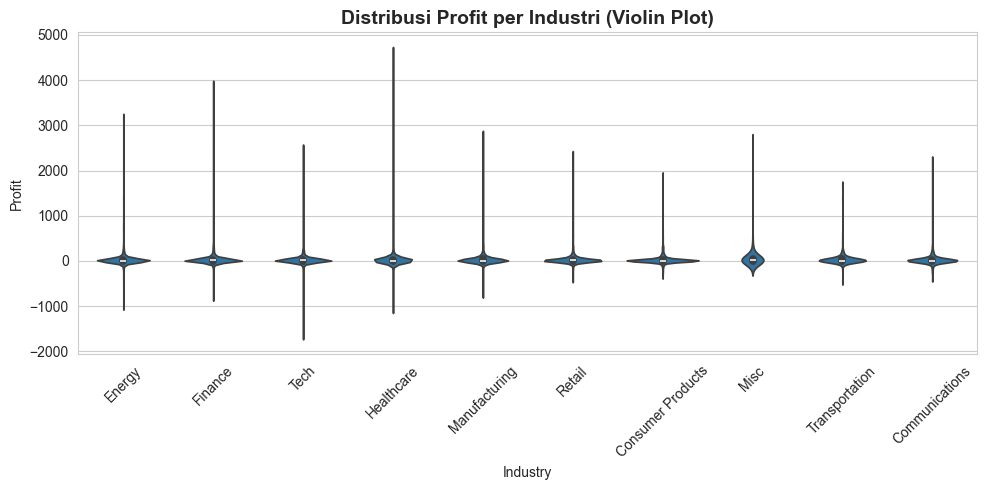

In [38]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Industry', y='Profit', data=df_cleaned)
plt.title('Distribusi Profit per Industri (Violin Plot)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretasi**:

**Outlier positif besar**:
- Healthcare, Finance, dan Manufacturing menunjukkan distribusi dengan ekor panjang ke atas (hingga >4000–4500), artinya ada transaksi profit sangat besar.
- Menunjukkan potensi high gain, tapi kemungkinan hanya dari sedikit transaksi.

**Profit negatif**:
- Semua industri mengalami rentang profit negatif (hingga sekitar -1000 hingga -1800), menunjukkan adanya risiko kerugian yang signifikan.

**Miscellaneous (Misc)**:
- Sebaran dominan di area positif.
- Profit stabil dan cenderung menguntungkan.
- Ini memperkuat grafik sebelumnya soal rata-rata profit tertinggi di industri ini.

**Tech dan Consumer Products**:
- Punya distribusi yang cenderung simetris di sekitar nol dengan sedikit bagian positif, mencerminkan profit yang tipis atau volatilitas rendah.

<h4> 6.2.8 Distribusi Diskon </h4>

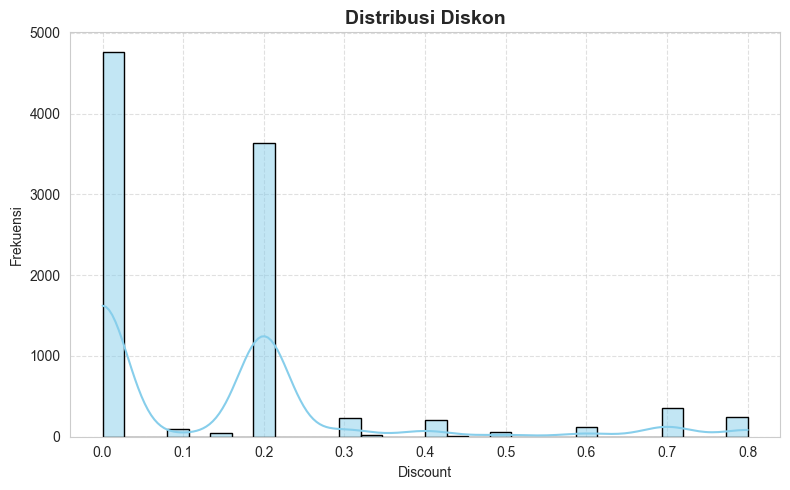

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Discount'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribusi Diskon', fontsize=14, fontweight='bold')
plt.xlabel('Discount')
plt.ylabel('Frekuensi')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Interpretasi**:
- Mayoritas transaksi tidak menggunakan diskon
- Diskon 20% sering diterapkan
- Diskon antara 0.1 – 0.8 relatif jarang diberikan, dengan jumlah transaksi <500 untuk masing-masing kategori. 
- Ada beberapa nilai diskon yang sering muncul: 0%, 20%, 70%. Kemungkinan menandakan adanya program diskon tertentu atau kategori pelanggan khusus.

<h3> 6.3 Deteksi Outlier </h3>

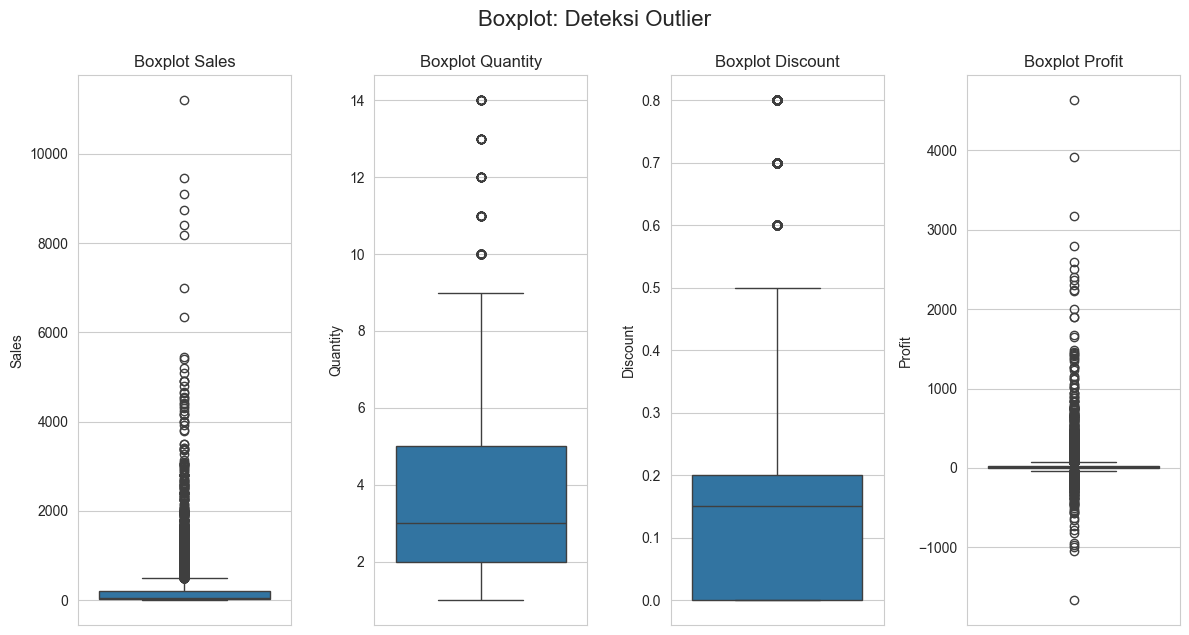

In [40]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_features):
    plt.subplot(1, len(num_features), i+1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot {col}')
    plt.tight_layout()

plt.suptitle('Boxplot: Deteksi Outlier', fontsize=16, y=1.05)
plt.show()

**Interpretasi**: 
- **Sales**: banyak outlier dibagian atas. Distribusi Skewed Positif.
- **Quantity**: Outlier muncul di atas nilai 9, terutama pada 12, 13, dan 14.
- **Discount**: Outlier terdeteksi di atas 50%. Distribusi Skewed Positif.
- **Profit**: banyak outlier ekstrem, Distribusi profit menyebar lebar dan berisiko tinggi.

<h3> 6.4 Korelasi antar Variabel </h3>

<h4> 6.4.1 Heatmap - Spearman </h4> 

**Notes**: Korelasi dikatakan kuat ketika mencapai 0.7

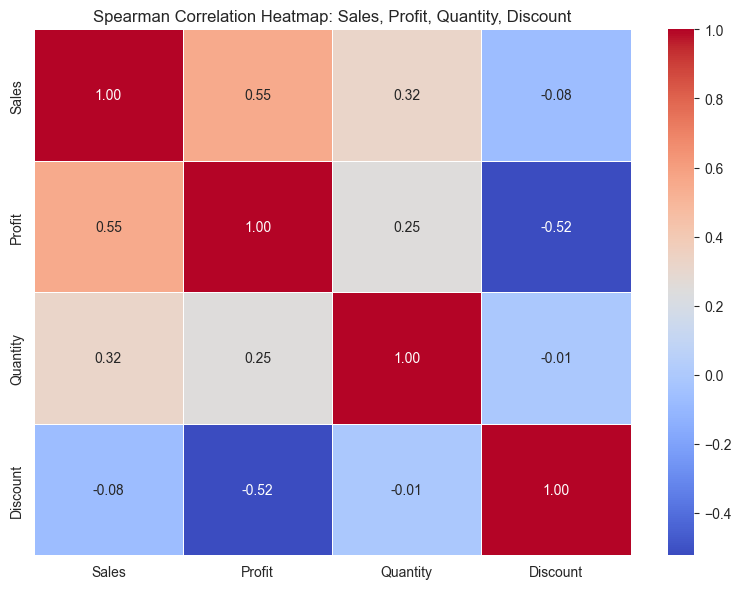

In [41]:
# 3. Hitung korelasi Spearman
spearman_corr = df_cleaned[['Sales', 'Profit', 'Quantity', 'Discount']].corr(method='spearman')

# 4. Buat heatmap dan simpan
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Spearman Correlation Heatmap: Sales, Profit, Quantity, Discount")
plt.tight_layout()

**Interpretasi**:
- Sales - Profit (0.55): Korelasi positif sedang, dimana  semakin tinggi penjualan, profit meningkat.
- Sales - Quantity (0.32): Korelasi positif lemah, peningkatan penjualan mendorong naiknya kuantitas dengan persentase lebih rendah. 
- Sales - Discount (-0.08): Korelasi negatif sangat lemah, tidak banyak berpengaruh.
- Profit - Quantity	(0.25):	Korelasi positif lemah, tidak banyak berpengaruh
- Profit - Discount	(-0.52): Korelasi negatif cukup kuat, dimana besaran diskon berpengaruh pada pelemahan profit.
- Quantity - Discount (-0.01):  Diskon tidak secara langsung mendorong lebih banyak pembelian.

<h4> 6.4.2 Scatter Plot: Hubungan antar Variabel (Discount, Profit, Quantity) </h4> 

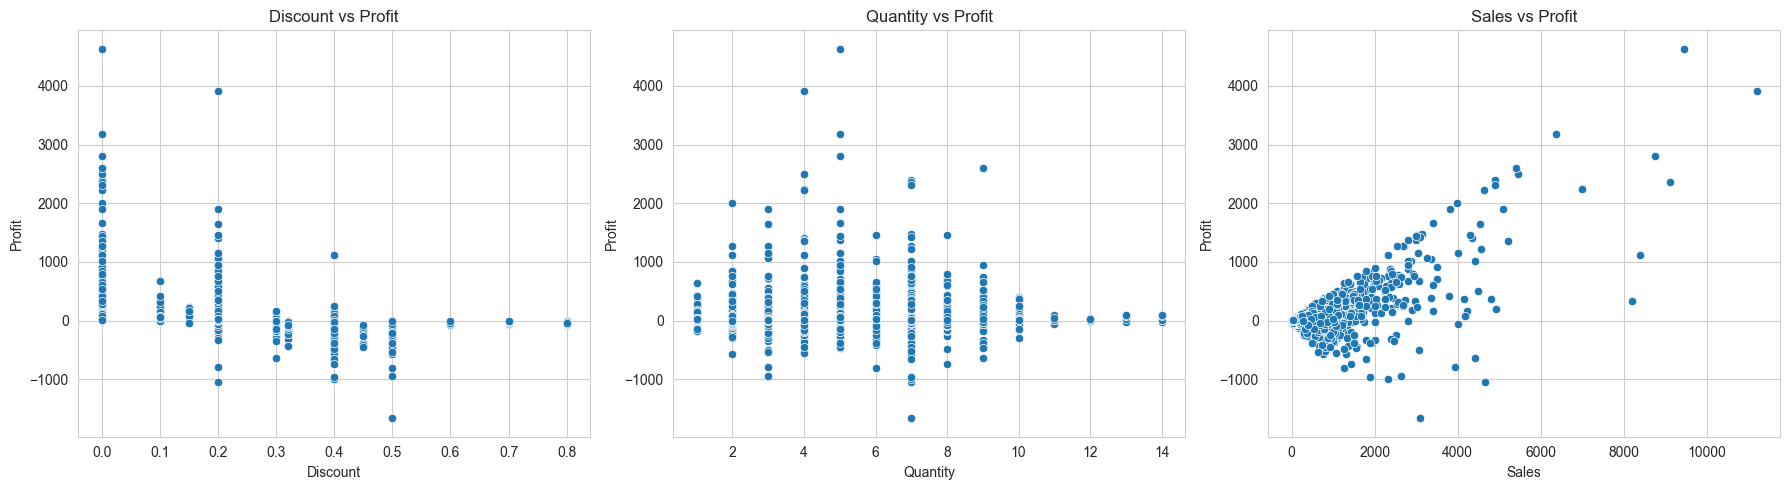

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Discount vs Profit
sns.scatterplot(x='Discount', y='Profit', data=df_cleaned, ax=axs[0])
axs[0].set_title('Discount vs Profit')

# Quantity vs Profit
sns.scatterplot(x='Quantity', y='Profit', data=df_cleaned, ax=axs[1])
axs[1].set_title('Quantity vs Profit')

# Sales vs Profit
sns.scatterplot(x='Sales', y='Profit', data=df_cleaned, ax=axs[2])
axs[2].set_title('Sales vs Profit')

plt.tight_layout()
plt.show()

**Interpretasi**:

**1. Discount vs Profit**
- Korelasi Negatif. 
- Distribusi: Banyak titik profit negatif pada diskon tinggi.
- Diskon tinggi justru menghasilkan kerugian.
- **Mendukung korelasi Spearman sebelumnya**

**2. Quantity vs Profit**
- Tidak linier
- Sebaran profit luas. mulai dari quantity 10 ke atas, profit cenderung rendah/negatif.
- Menjual lebih banyak unit tidak selalu menghasilkan profit lebih tinggi. Hal ini terjadi dimungkinkan karena margin per unit rendah atau ada diskon khusus yang diberikan dalam pembelian jumlah besar

**3. Sales vs Profit**
- Korelasi positif.
- Sebarannya variatif.
- Ada beberapa transaksi penjualan besar dengan profit yang kecil atau negatif,  kemungkinan karena diskon besar atau biaya tinggi.

<h4> 6.4.3 Korelasi Diskon dan Profit per Wilayah </h4>

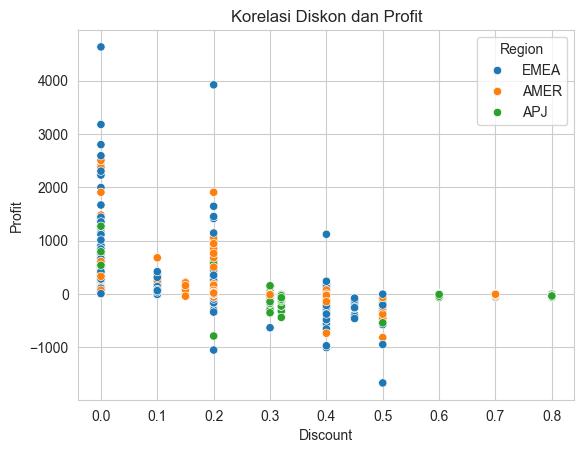

In [43]:
sns.scatterplot(x='Discount', y='Profit', hue='Region', data=df_cleaned)
plt.title("Korelasi Diskon dan Profit")
plt.show()

**Interpretasi**

**1. EMEA : sangat sensitif terhadap diskon** 
- Titik paling banyak dan tersebar luas di seluruh rentang diskon.
- Korelasi negatif, profit menurun drastis seiring kenaikan diskon.
- Terlihat beberapa outlier positif pada diskon rendah (0), namun makin banyak kerugian di diskon tinggi.

**2. AMER**
- Terkonsentrasi di diskon 0–0.2.
- Korelasi negatif tetap terlihat. 
- AMER lebih stabil dari EMEA

**3. APJ: diskon memperburuk performa profit**
- Jumlah titik lebih sedikit.
- Konsentrasi data di diskon 0.3–0.5 dengan profit kebanyakan negatif.
- Hampir tidak ada titik profit tinggi.

<h4> 6.4.4 Pairplot </h4>

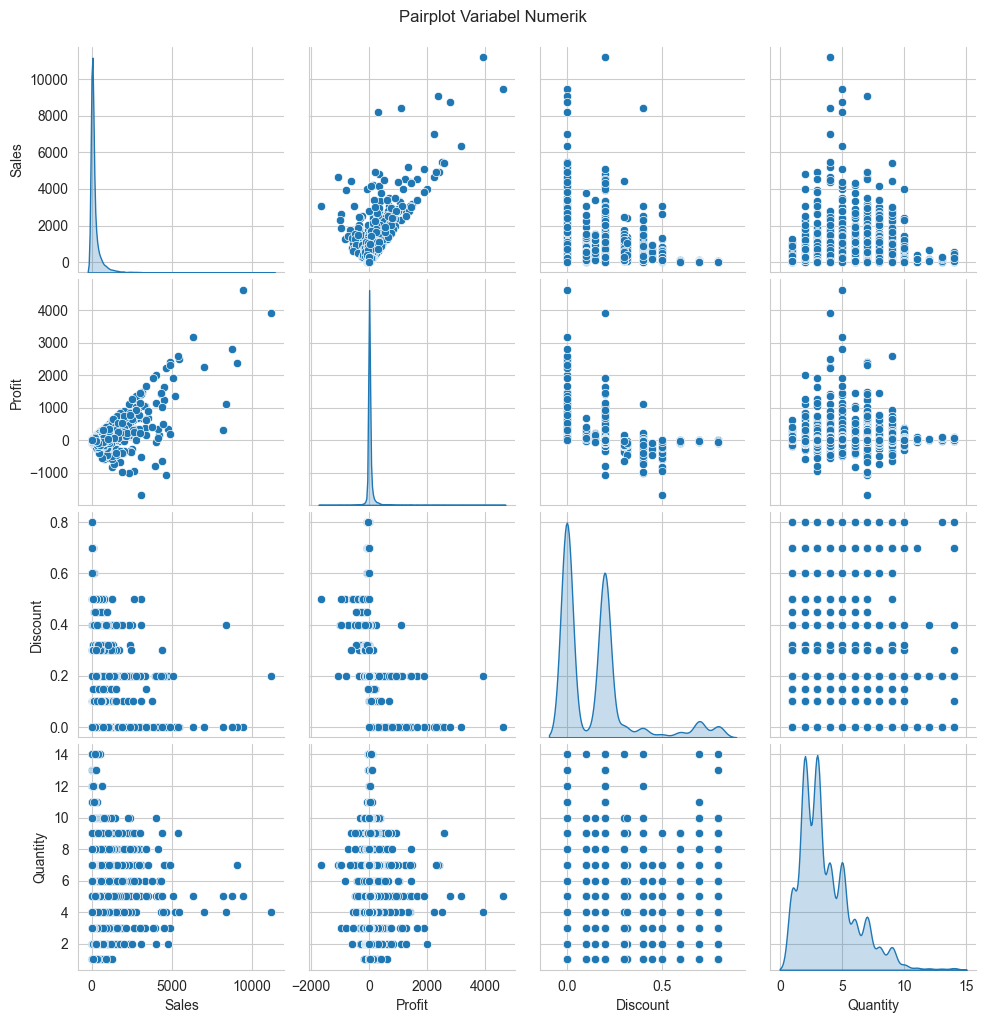

In [44]:
sns.pairplot(df_cleaned[['Sales', 'Profit', 'Discount', 'Quantity']], diag_kind='kde')
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()

**Visualisasi ini memperkuat analisis korelasi sebelumnya (Spearman).**

**Interpretasi Distribusi Tiap Variabel (Diagonal Plot):**

- **Sales**: Distribusi kemiringannya positif, banyak transaksi kecil dan sedikit transaksi besar.
- **Profit**: Hampir simetris, variasi profit tinggi.
- **Discount**: Distribusi banyak di 0 dan 0.2 persen. diskon tidak tetap. 
- **Quantity**: Terdistribusi normal ke kanan, mayoritas pembelian di 1–5 unit.

**Interpretasi Korelasi:**
- **Sales vs Profit** -> Positif. semakin tinggi sales, profit meningkat.
- **Discount vs Profit** -> negatif. makin besar diskon, profit cenderung menurun.
- **Quantity vs Profit** -> tidak berkorelasi atau berkorelasi lemah.
- **Sales vs Discount** -> tidak berkorelasi atau berkorelasi lemah.
- **Sales vs Quantity** -> berkorelasi lemah dan positif. 
- **Discount vs Quantity** -> tidak berkorelasi atau berkorelasi lemah.

<h3> 6.5 Top 10 Produk </h3>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7820\2217035315.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')


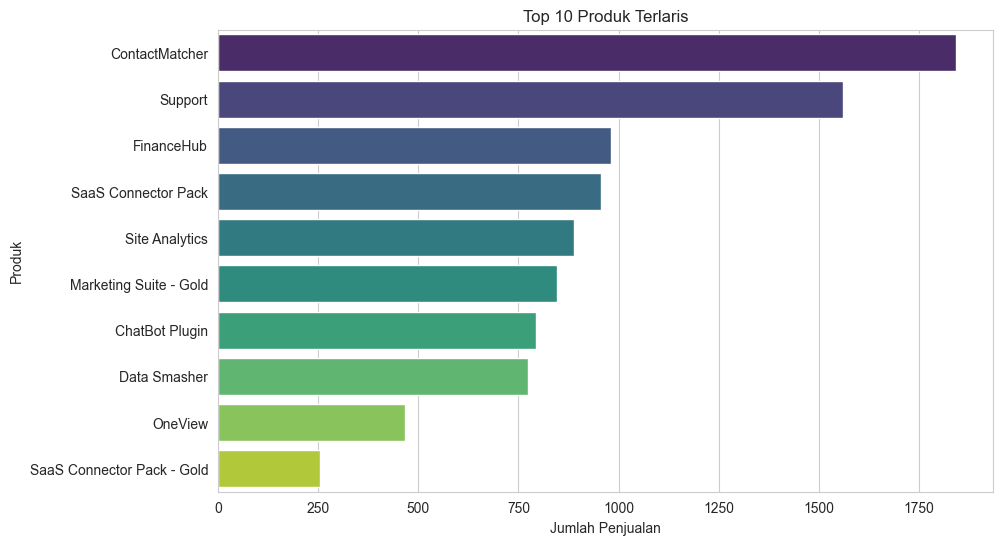

In [45]:
top_products = df['Product'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')
plt.title('Top 10 Produk Terlaris')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Produk')
plt.show()

**Keseluruhan**:
- Data yang didapatkan terbukti tidak terdistribusi normal.
- Terdapat dua opsi: Dari pengecekan data didapatkan bahwa pengujian dalam data ini cocok menggunakan uji non-parametrik. Hal ini terjadi karena adanya data yang tidak terdistribusi normal dan outlier, serta variablitas yang banyak. 

<h2> 7. Uji Inferensial </h2>

<h3> 7.1 Uji Statistik Mann-Whitney U </h3>

**Hipotesis**: 

- H0:Tidak ada perbedaan distribusi profit antara industri 1 dan industri 2.
- H1:Terdapat perbedaan distribusi profit antara industri 1 dan industri 2.

In [46]:
# Pastikan Profit numerik
df_cleaned['Profit'] = pd.to_numeric(df_cleaned['Profit'], errors='coerce')

# Ambil daftar industri unik
industries = df_cleaned['Industry'].dropna().unique()

# List hasil
results = []

# Loop semua kombinasi pasangan industri
for a, b in combinations(industries, 2):
    group1 = pd.to_numeric(df_cleaned[df_cleaned['Industry'] == a]['Profit'], errors='coerce').dropna()
    group2 = pd.to_numeric(df_cleaned[df_cleaned['Industry'] == b]['Profit'], errors='coerce').dropna()
    
    if not group1.empty and not group2.empty:
        stat, p = mannwhitneyu(group1, group2)
        status = "Signifikan" if p < 0.05 else "Tidak Signifikan"
        results.append((a, b, round(p, 4), status))

# Konversi ke DataFrame
results_df = pd.DataFrame(results, columns=['Industry 1', 'Industry 2', 'p-value', 'Status'])

# Tampilkan hasil
print("Pasangan Tidak Signifikan:")
print(results_df[results_df["Status"] == "Tidak Signifikan"].sort_values("p-value").to_string(index=False))

print("\nPasangan Signifikan (p < 0.05):")
print(results_df[results_df["Status"] == "Signifikan"].sort_values("p-value").to_string(index=False))

Pasangan Tidak Signifikan:
       Industry 1        Industry 2  p-value           Status
           Energy           Finance   0.0885 Tidak Signifikan
             Tech              Misc   0.0912 Tidak Signifikan
           Energy            Retail   0.1068 Tidak Signifikan
       Healthcare              Misc   0.1081 Tidak Signifikan
           Energy    Communications   0.1216 Tidak Signifikan
          Finance              Misc   0.1470 Tidak Signifikan
    Manufacturing              Misc   0.1612 Tidak Signifikan
           Energy     Manufacturing   0.1641 Tidak Signifikan
           Energy Consumer Products   0.1820 Tidak Signifikan
           Retail              Misc   0.1848 Tidak Signifikan
           Energy    Transportation   0.2250 Tidak Signifikan
             Misc    Transportation   0.2729 Tidak Signifikan
           Energy        Healthcare   0.3775 Tidak Signifikan
           Energy              Tech   0.3975 Tidak Signifikan
             Tech            Retail   0.417

**Interpretasi:**
- Consumer Products dan Communications adalah industri dengan distribusi profit yang paling berbeda dibanding lainnya.
-  Energy, Retail, Manufacturing, Finance punya distribusi profit yang relatif mirip, karena tidak signifikan secara statistik.

<h3> 7.2 Uji Statistik Kruskal-Wallis </h3>

**Hipotesis**:
- H0 : Tidak terdapat perbedaan signifikan dalam distribusi profit antar industri.
- H1 : Terdapat perbedaan signifikan dalam distribusi profit antar industri.

In [47]:
industry_groups = [df[df['Industry'] == i]['Profit'] for i in df['Industry'].unique()]
stat, p = kruskal(*industry_groups)
print(f"Kruskal-Wallis p-value: {p:.4f}")

Kruskal-Wallis p-value: 0.0042


**Interpretasi Kruskal-Wallis**: 
- H1 diterima. 
- p-value = 0.0042 < 0.05 berarti terdapat perbedaan signifikan secara statistik antara profit di berbagai industri.
- Yang mengartikan bahwa strategi pricing atau produk harus disesuaikan untuk tiap industri.

<h3> 7.3 Uji Normalitas Shapiro-Wilk </h3>

**Hipotesis**
- H0: Data terdistribusi normal.
- H1: Data tidak terdistribusi normal.

In [48]:
# Uji normalitas pada variabel numerik
print("Uji Normalitas (Shapiro-Wilk Test):")
for col in num_features:
    stat, p = shapiro(df_cleaned[col])
    print(f"{col}: p-value = {p:.4f}, Data terklasifikasi: {'Normal' if p > 0.05 else 'Tidak normal'}")

Uji Normalitas (Shapiro-Wilk Test):
Sales: p-value = 0.0000, Data terklasifikasi: Tidak normal
Quantity: p-value = 0.0000, Data terklasifikasi: Tidak normal
Discount: p-value = 0.0000, Data terklasifikasi: Tidak normal
Profit: p-value = 0.0000, Data terklasifikasi: Tidak normal


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9801.
  res = hypotest_fun_out(*samples, **kwds)


**Pengujian ini mengkonfirmasi bahwa data tidak terdistribusi normal**

didapatkan bahwa seluruh data tidak normal karena p-valuenya dibawah 0.05. 

<h3> 7.4 Uji Korelasi Spearman </h3>

**Hipotesis**: 
- H0: Tidak ada korelasi monotonic antara Discount dan Profit.
- H1: Ada korelasi monotonic antara Discount dan Profit.

In [49]:
stat, p = spearmanr(df_cleaned['Discount'], df_cleaned['Profit'])
print("Spearman correlation:", stat, "| p-value:", p)

Spearman correlation: -0.5229587931396283 | p-value: 0.0


**Interpretasi**:  
- H0 ditolak. 
- Hasilnya menunjukkan bahwa korelasi berpola negatif dan p-value menunjukkan adanya signifikansi karena nilainya <0.5, dimana semakin besar diskon, semakin kecil profit.

<h2> 8. Analisis Bisnis</h2>

<h3> 8.3.1 Analisis Time Series Penjualan </h3>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7820\4166825419.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_time.resample('M')['Sales'].sum()


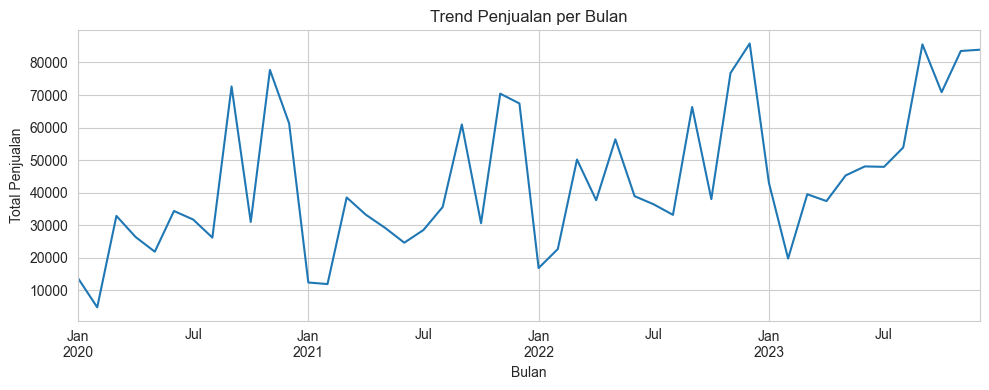

In [50]:
# Pastikan kolom tanggal dalam format datetime
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])

df_time = df_cleaned.copy()
df_time.set_index('Order Date', inplace=True)
monthly_sales = df_time.resample('M')['Sales'].sum()


plt.figure(figsize=(10, 4))
monthly_sales.plot()
plt.title('Trend Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretasi:**

Volatilitas Tinggi, Tren tahun ketahun mengalami peningkatan, terlihat adanya pergerakan seasonality dimana penjualan cenderung lebih rendah pada awal tahun (Jan-Feb), kemudian naik signifikan pada pertengahan tahun (Mei–Agustus) dan akhir tahun (Okt–Des).

<h3> 8.3.2 Analisis Segmentasi Pelanggan</h3>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7820\3401238090.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_segment.values, y=customer_segment.index, palette='viridis')


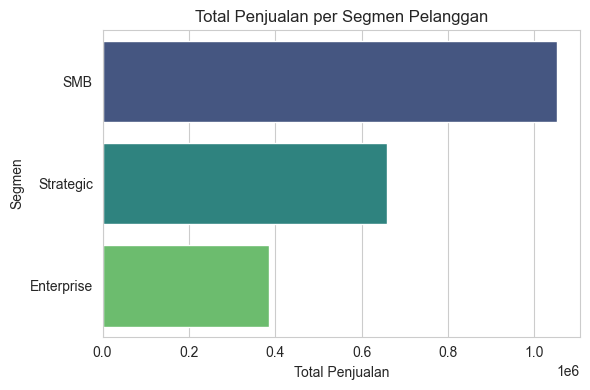

In [51]:
customer_segment = df_cleaned.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=customer_segment.values, y=customer_segment.index, palette='viridis')
plt.title('Total Penjualan per Segmen Pelanggan')
plt.xlabel('Total Penjualan')
plt.ylabel('Segmen')
plt.tight_layout()
plt.show()

**Interpretasi:**
Segmen SMB (Small and Medium Business) merupakan kontributor utama penjualan terbesar, yaitu lebih dari 1 juta. Diikuti segment strategik dan enterprise.

<h3> 8.3.3 Analisis Produk Terlaris</h3>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7820\555767176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


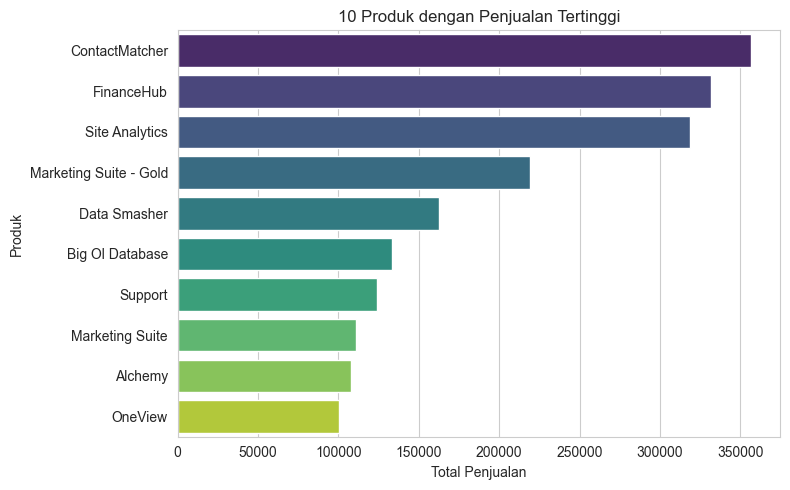

In [52]:
top_products = df_cleaned.groupby('Product')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('10 Produk dengan Penjualan Tertinggi')
plt.xlabel('Total Penjualan')
plt.ylabel('Produk')
plt.tight_layout()
plt.show()


**Penjelasan:**
Kontributor utama dalam pendapatan pada data ini adalah ContactMatcher, FinanceHub, Site Analytics yang memiliki penjualan yang jauh lebih besar dibandingkan dengan produk lainnya. 

<h3> 8.3.4 Analisis Profitabilitas Produk</h3>

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7820\862825215.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_profit.values, y=product_profit.index, palette='viridis')


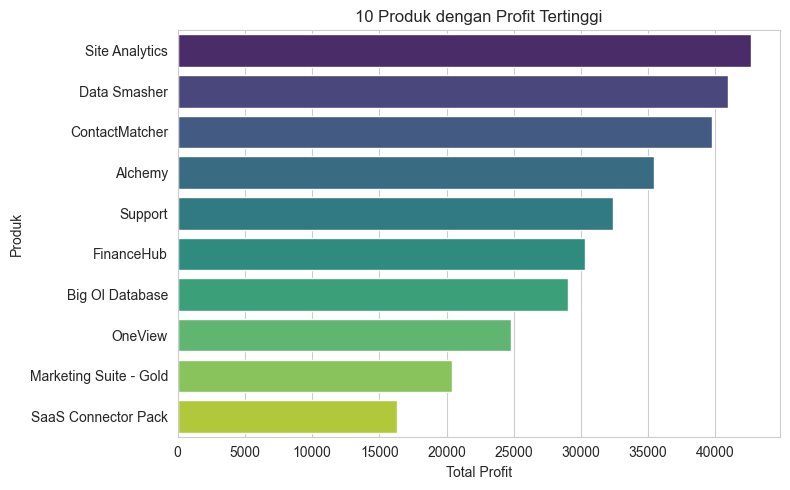

In [53]:
product_profit = df_cleaned.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=product_profit.values, y=product_profit.index, palette='viridis')
plt.title('10 Produk dengan Profit Tertinggi')
plt.xlabel('Total Profit')
plt.ylabel('Produk')
plt.tight_layout()
plt.show()

**Penjelasan**: Site Analytics, Data Smasher, ContactMatcher merupakan penghasil laba tertinggi.

<h3> 8.3.4 Heatmap: Penjualan Bulanan per Tahun </h3>

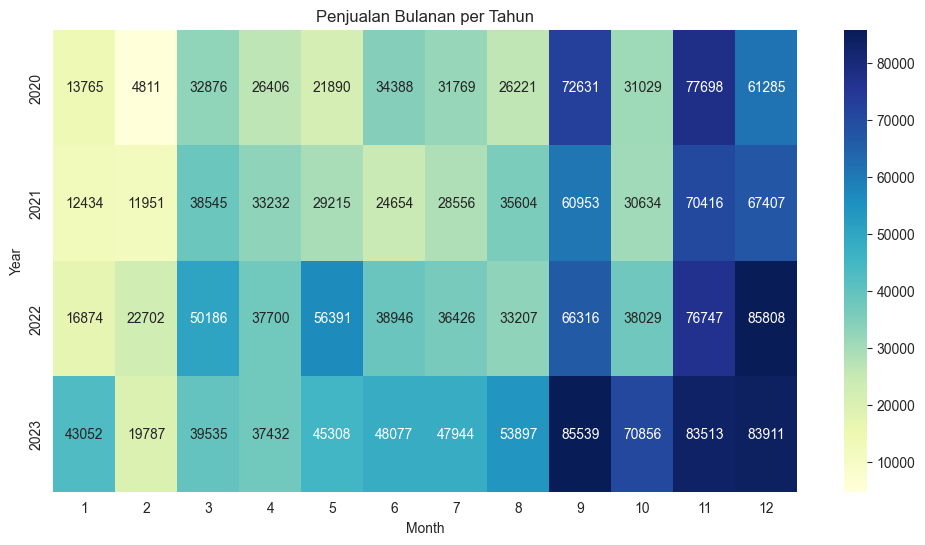

In [54]:
# Analisis time series
df_cleaned['Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Month'] = df_cleaned['Order Date'].dt.month
monthly_sales = df_cleaned.groupby(['Year', 'Month'])['Sales'].sum().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(monthly_sales, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Penjualan Bulanan per Tahun')
plt.show()

**Penjelasan**:
- Tren menunjukkan adanya peningkatan penjualan dan adanya pertumbuhan bisnis dari tahun ke tahun. 
- Pergerakan seasonal, adanya peningkatan signifikan pada bulan November dan Desember di setiap tahun (2020–2023).Dimana, banyak promosi akhir tahun. 
- Awal tahun konsisten dengan penurunan penjualan, di bulan Januari dan Februari di semua tahun.
- Adanya nilai yang sangat rendah pada Februari 2020 (4.8k) Kemungkinan efek awal pandemi COVID-19.

<h2> 9. Bisnis Insight </h2>

**9.1 Hubungan Variabel Penjualan terhadap Profitabilitas**
- **Sales vs Profit**: Penjualan tinggi cenderung menghasilkan profit tinggi.Analisis mendukung hipotesis H1 bahwa terdapat hubungan positif antara sales dan profit.
- **Discount vs Profit**: Diskon besar menyebabkan margin keuntungan menurun.Analisis mendukung hipotesis bahwa diskon besar berdampak negatif pada profit.
- **Quantity vs Profit**: Banyaknya kuantitas belum tentu mendongkrak profit.

**9.2 Kerugian dan Efisiensi berdasarkan Industri, Wilayah, dan Segmen**
- **Wilayah EMEA dan AMER efisien secara profit**, yang memiliki potensi pasar yang kuat atau efisiensi operasional yang tinggi di wilayah ini.
- **Finance, Healthcare, dan Manufacturing** merupakan industri dengan profit rata-rata tertinggi: .
- **Industri Communications dan Miscellaneous** profitnya mendekati nol: .
- **Segmen SMB atau UMKM** memiliki kontribusi terbesar dalam sales, sementara Enterprise bervolume kecil namun berpotensi memiliki nilai pelanggan tinggi.
- **Hasil uji statistik Kruskal-Wallis dan Mann-Whitney** menunjukkan bahwa terdapat perbedaan signifikan antar industri. hipotesis H1 diterima dan menolak H0. Hal ini mengindikasikan adanya ketidakseimbangan efisiensi, bahkan potensi kerugian pada beberapa sektor industri tertentu.

**9.3 Tren Musiman Penjualan**
- Penjualan rendah di awal tahun (Jan–Feb), dan tinggi di Mei–Agustus serta Oktober–Desember.
- Analisis tren ini menunjukkan adanya pola musiman (seasonal) yang bisa memaksimalkan penjualan dalam peak-day, **Temuan ini mendukung hipotesis bahwa terdapat seasonality dalam penjualan SaaS**.

**9.4 Produk Terlaris dan Paling Menguntungkan**
- Produk dengan penjualan tertinggi: ContactMatcher, FinanceHub, Site Analytics.
- Produk dengan profit tertinggi: Site Analytics, Data Smasher, ContactMatcher.
- Perlu fokus pada produk dengan margin tinggi, bukan hanya volume penjualan.

**9.5 Rekomendasi Strategis**
- Fokus pada produk dengan margin tinggi untuk meningkatkan profit.
- Batasi atau optimalkan diskon untuk menghindari kerugian.
- Susun campaign promosi musiman menyesuaikan tren penjualan tahunan.
- Perkuat strategi retensi pelanggan pada segmen SMB.
- Evaluasi portofolio produk berdasarkan industri yang berprofit rendah.
- Fokuskan ekspansi bisnis di wilayah yang sudah menunjukkan efisiensi tinggi (EMEA, AMER).

<h2> 10. Kesimpulan </h2>

Analisis data penjualan SaaS menunjukkan bahwa variabel penjualan memiliki pengaruh signifikan terhadap profitabilitas. Diskon yang terlalu besar terbukti mengurangi margin keuntungan, sementara peningkatan kuantitas penjualan tidak selalu sejalan dengan kenaikan profit. Beberapa wilayah dan industri menunjukkan efisiensi operasional yang lebih tinggi, dengan segmen SMB (UMKM) berperan sebagai kontributor utama pendapatan. Selain itu, identifikasi terhadap tren musiman dan produk unggulan memberikan peluang untuk perencanaan strategi yang lebih presisi. Pengujian hipotesis mendukung adanya korelasi signifikan antar variabel dan menjadi patokan untuk mendongkrak pengoptimalan bisnis.